
Aim of this part is to verfy homogenization by comparing solution obatined by homogenization and solution obtained by numerical calculation.

Two different works are presented here. One is by Daniel Lin using finite different scheme on original Equation, another by Ziang Yan using "Kirchhoff's current law" under the assumption that the composite behave in a similar way to "Resistor Network".

The work presented in this notebook is a DRAFT of later simulation.



In [ ]:
# Imports
import numpy as np
from copy import deepcopy
from matplotlib import pyplot as plt

In [ ]:
# Global Settings

# Dimension of simulation
dim=63

# We assume two material exists, one with resistance 1, another decided by variable res_2
res_2=10
grid=np.zeros((dim,dim))
center=int((dim-1)/2)
grid[center,center]=6000
num_iter=1000

In [ ]:
# Functions
def coefs(i,j,res=res_2):
    '''
    # RU arrow
    if (i+j)%2==0:
        #up,left,down,right
        return (1,1,res,res)
    else:
        return (res,res,1,1)
        '''
    # LU arrow
    if (i+j)%2==0:
        #up,left,down,right
        return (1,res,res,1)
    else:
        return (res,1,1,res)

def update(i,j):
    #gives updated value of i,j point
    up=grid[i-1,j]
    left=grid[i,j-1]
    down=grid[i+1,j]
    right=grid[i,j+1]
    co=coefs(i,j)
    val=(
        up*co[1]*co[2]*co[3]
        +left*co[0]*co[2]*co[3]
        +down*co[0]*co[1]*co[3]
        +right*co[0]*co[1]*co[2]
    )/(
        co[1]*co[2]*co[3]
        +co[0]*co[2]*co[3]
        +co[0]*co[1]*co[3]
        +co[0]*co[1]*co[2]
        )

    return val

In [ ]:
newgrid=deepcopy(grid)
for time in range(num_iter):
    for i in range(1,dim-1):
        for j in range(1,dim-1):
            newgrid[i,j]=update(i,j)
    newgrid[center,center]=grid[center,center]
    grid=deepcopy(newgrid)



#a=[i for i in range(dim)]
#x,y=np.meshgrid(a,a)
#plt.matshow(grid, cmap=plt.cm.gray)
#plt.show()

x_values = np.linspace(0,10,100)
y_values = np.linspace(0,10,100)
x, y = np.meshgrid(x_values, y_values)


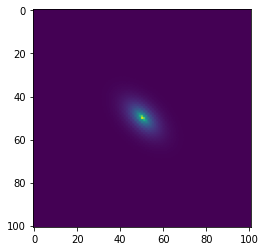

In [ ]:
plt.imshow(grid)

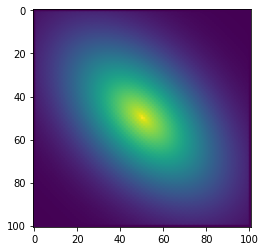

In [ ]:
# To get better view scale the value by taking power of 0.1
plt.imshow(grid**0.1)

# Discussion on plots
Content similar to 100 case, except that the voltage distribution is less "skewed".